Талавер Олег ПІ-60[2]
Репозиторій: https://gitlab.com/bachelors2022/pi-60/talaver-oleg/other/ai.git

# ДОСЛІДЖЕННЯ МЕТОДІВ НЕКОНТРОЛЬОВАНОГО НАВЧАННЯ

## Створення класифікаторів на основі випадкових та гранично випадкових лісів

Використовувати файл вхідних даних: data_random_forests.txt, побудувати класифікатори на основі випадкових та гранично випадкових лісів.

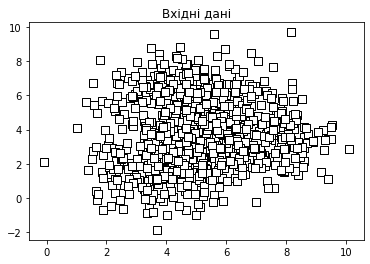

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from utilities import visualize_classifier

# Завантаження вхідних даних
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Розбиття вхідних даних на три класи
class_0 = np.array(X[y == 0])
class_1 = np.array(X[y == 1])
class_2 = np.array(X[y == 2])

# Візуалізація вхідних даних
plt.figure()
scatter_params = {'s': 75, 'facecolors': 'white', 'edgecolors': 'black', 'linewidths': 1, 'marker': 's'}
plt.scatter(class_0[:, 0], class_0[:, 1], **scatter_params)
plt.scatter(class_1[:, 0], class_1[:, 1], **scatter_params)
plt.scatter(class_2[:, 0], class_2[:, 1], **scatter_params)
plt.title('Вхідні дані')
plt.show()

# Розбивка даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Класифікатор на основі ансамблевого навчання
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}

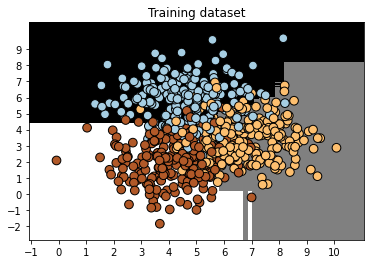

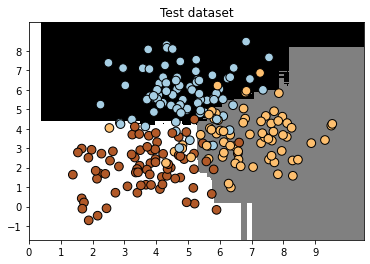

In [14]:
classifier = RandomForestClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [15]:
# Перевірка роботи класифікатора
class_names = ['Class-0', 'Class-1', 'Class-2']
print('\n' + '#' * 40)
print('Classifier performance on training dataset')
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))


########################################
Classifier performance on training dataset
              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675



In [16]:
print('\n' + '#' * 40)
print('Classifier performance on test dataset')
print(classification_report(y_test, y_test_pred, target_names=class_names))


########################################
Classifier performance on test dataset
              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225



In [17]:
# Обчислення параметрів довірливості
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])
print('\nConfidence measure:')
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
    print('Datapoint:', datapoint)
    print('Predicted class:', predicted_class)


Confidence measure:
Datapoint: [5 5]
Predicted class: Class-0
Datapoint: [3 6]
Predicted class: Class-0
Datapoint: [6 4]
Predicted class: Class-1
Datapoint: [7 2]
Predicted class: Class-1
Datapoint: [4 4]
Predicted class: Class-2
Datapoint: [5 2]
Predicted class: Class-2


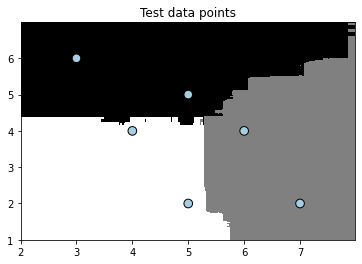

In [18]:
# Візуалізація точок даних
visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 'Test data points')

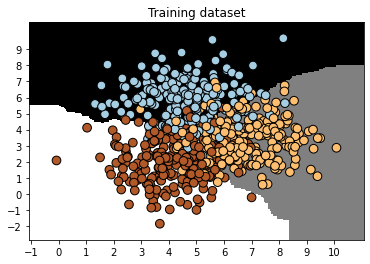

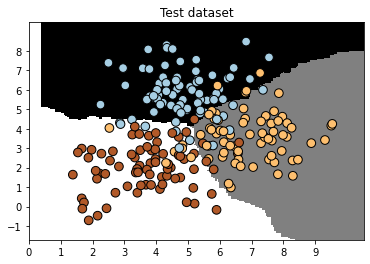

In [19]:
classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [20]:
# Перевірка роботи класифікатора
class_names = ['Class-0', 'Class-1', 'Class-2']
print('\n' + '#' * 40)
print('Classifier performance on training dataset')
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))


########################################
Classifier performance on training dataset
              precision    recall  f1-score   support

     Class-0       0.89      0.83      0.86       221
     Class-1       0.82      0.84      0.83       230
     Class-2       0.83      0.86      0.85       224

    accuracy                           0.85       675
   macro avg       0.85      0.85      0.85       675
weighted avg       0.85      0.85      0.85       675



In [21]:
print('\n' + '#' * 40)
print('Classifier performance on test dataset')
print(classification_report(y_test, y_test_pred, target_names=class_names))


########################################
Classifier performance on test dataset
              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.84      0.84      0.84        70
     Class-2       0.85      0.92      0.89        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225



In [22]:
# Обчислення параметрів довірливості
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])
print('\nConfidence measure:')
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
    print('Datapoint:', datapoint)
    print('Predicted class:', predicted_class)


Confidence measure:
Datapoint: [5 5]
Predicted class: Class-0
Datapoint: [3 6]
Predicted class: Class-0
Datapoint: [6 4]
Predicted class: Class-1
Datapoint: [7 2]
Predicted class: Class-1
Datapoint: [4 4]
Predicted class: Class-2
Datapoint: [5 2]
Predicted class: Class-2


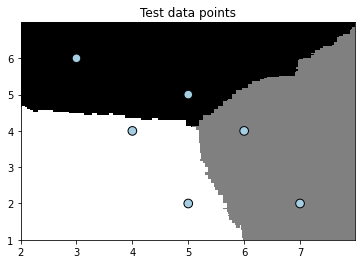

In [23]:
# Візуалізація точок даних
visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 'Test data points')

З графіків видно, що гранично випадкові ліси, за рахунок більшої рандомізації, дають більш плавні межі класів

## Обробка дисбалансу класів

Використовуючи для аналізу дані, які містяться у файлі data_imbalance.txt проведіть обробку з урахуванням дисбалансу класів.

C:\Users\o.talaver\AppData\Local\Temp\ipykernel_32692\2662390349.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], facecolors='black', marker='x', **scatter_params)


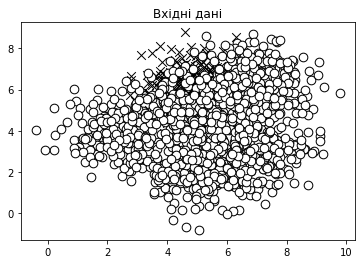

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from utilities import visualize_classifier

# Завантаження вхідних даних
input_file = 'data_imbalance.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Поділ вхідних даних на два класи на підставі міток
class_0 = np.array(X[y == 0])
class_1 = np.array(X[y == 1])

# Візуалізація вхідних даних
plt.figure()
scatter_params = {'s': 75, 'edgecolors': 'black', 'linewidths': 1}
plt.scatter(class_0[:, 0], class_0[:, 1], facecolors='black', marker='x', **scatter_params)
plt.scatter(class_1[:, 0], class_1[:, 1], facecolors='white', marker='o', **scatter_params)
plt.title('Вхідні дані')

# Розбиття даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

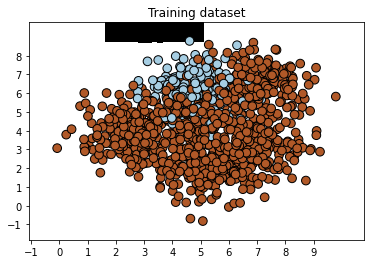

In [26]:
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

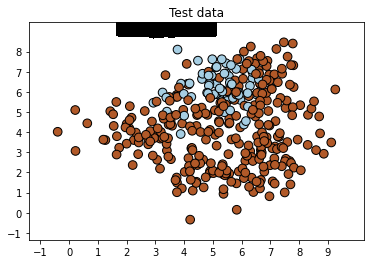

In [27]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test data')

In [28]:
# Обчислення показників ефективності класифікатора
class_names = ['Class-0', 'Class-1']
print('\n' + '#' * 40)
print('Classifier performance on training dataset')
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))


########################################
Classifier performance on training dataset
              precision    recall  f1-score   support

     Class-0       1.00      0.01      0.01       181
     Class-1       0.84      1.00      0.91       944

    accuracy                           0.84      1125
   macro avg       0.92      0.50      0.46      1125
weighted avg       0.87      0.84      0.77      1125



In [29]:
print('\n' + '#' * 40)
print('Classifier performance on test dataset')
print(classification_report(y_test, y_test_pred, target_names=class_names))


########################################
Classifier performance on test dataset
              precision    recall  f1-score   support

     Class-0       0.00      0.00      0.00        69
     Class-1       0.82      1.00      0.90       306

    accuracy                           0.82       375
   macro avg       0.41      0.50      0.45       375
weighted avg       0.67      0.82      0.73       375



C:\University\AI\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\University\AI\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\University\AI\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


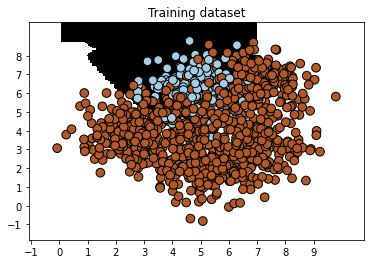

In [30]:
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}
classifier = ExtraTreesClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

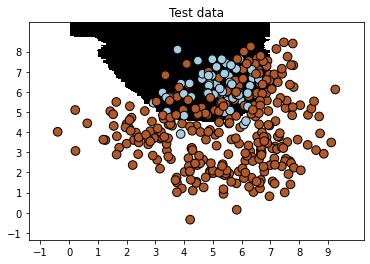

In [31]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test data')

In [32]:
# Обчислення показників ефективності класифікатора
class_names = ['Class-0', 'Class-1']
print('\n' + '#' * 40)
print('Classifier performance on training dataset')
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))


########################################
Classifier performance on training dataset
              precision    recall  f1-score   support

     Class-0       0.44      0.93      0.60       181
     Class-1       0.98      0.77      0.86       944

    accuracy                           0.80      1125
   macro avg       0.71      0.85      0.73      1125
weighted avg       0.89      0.80      0.82      1125



In [33]:
print('\n' + '#' * 40)
print('Classifier performance on test dataset')
print(classification_report(y_test, y_test_pred, target_names=class_names))


########################################
Classifier performance on test dataset
              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375



Опція балансування дерева допомагає у випадку коли в нас неоднакова к-ть даних у класах

### Знаходження оптимальних навчальних параметрів за допомогою сіткового пошуку

Використовуючи дані, що містяться у файлі знайти оптимальні навчальні параметрів за допомогою сіткового пошуку.

In [41]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Завантаження вхідних даних
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Розбиття вхідних даних на три класи
class_0 = np.array(X[y == 0])
class_1 = np.array(X[y == 1])
class_2 = np.array(X[y == 2])

# Розбивка даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Класифікатор на основі ансамблевого навчання
parameter_grid = [
    {'n_estimators': [100], 'max_depth': [2, 4, 7, 12, 16]},
    {'n_estimators': [25, 50, 100, 250], 'max_depth': [4]}
]

metrics = ['precision_weighted', 'recall_weighted']
for metric in metrics:
    print('Searching optimal parameters for', metric)
    classifier = GridSearchCV(ExtraTreesClassifier(random_state=0), parameter_grid, cv=5, scoring=metric)
    classifier.fit(X_train, y_train)

    print('Best parameters:', classifier.best_params_)

    y_pred = classifier.predict(X_test)
    print('Performance report')
    print(classification_report(y_test, y_pred))

Searching optimal parameters for precision_weighted
Best parameters: {'max_depth': 2, 'n_estimators': 100}
Performance report
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87        79
         1.0       0.81      0.86      0.83        70
         2.0       0.83      0.91      0.87        76

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225

Searching optimal parameters for recall_weighted
Best parameters: {'max_depth': 2, 'n_estimators': 100}
Performance report
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87        79
         1.0       0.81      0.86      0.83        70
         2.0       0.83      0.91      0.87        76

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86 

Методом сіточного пошуку можливо визначити оптимальні параметри для отримання кращих результатів за вказаними метриками

### Обчислення відносної важливості ознак

C:\University\AI\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

Adaboost regressor
Mean squared error = 22.7
Explained variance score = 0.79


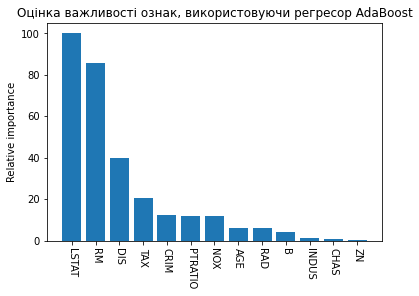

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor

# Завантаження даних із цінами на нерухомість
housing_data = datasets.load_boston()

# Перемішування даних
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# Розбиття даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Модель на основі регресора AdaBoost
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

# Обчислення показників ефективності регресора AdaBoost
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print('Adaboost regressor')
print('Mean squared error =', round(mse, 2))
print('Explained variance score =', round(evs, 2))

# Вилучення важливості ознак
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

# Нормалізація значень важливості ознак
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# Сортування та перестановка значень
index_sorted = np.flipud(np.argsort(feature_importances))

# Розміщення міток уздовж осі Х
pos = np.arange(index_sorted.shape[0]) + 0.5

# Побудова стовпчастої діаграми
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted], rotation=-90)
plt.ylabel('Relative importance')
plt.title('Оцінка важливості ознак, використовуючи регресор AdaBoost')
plt.show()

Беручи до уваги опис атрибутів та діаграму важливості можна сказати, що такі атрибути як LSTAT, RM відіграють найважливішу роль з усіх перелічених атрибутів

Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

## Прогнозування інтенсивності дорожнього руху за допомогою класифікатора на основі гранично випадкових лісів

In [55]:
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

# Завантажимо дані із файлу
input_file = 'traffic_data.txt'
data = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        items = line[:-1].split(',')
        data.append(items)

data = np.array(data)

# Перетворення рядкових даних на числові
label_encoder = []
X_encoded = np.empty(data.shape)
for i, item in enumerate(data[0]):
    if item.isdigit():
        X_encoded[:, i] = data[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(data[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Розбиття даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Регресор на основі гранично випадкових лісів
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
regressor = ExtraTreesRegressor(**params)
regressor.fit(X_train, y_train)

# Обчислення характеристик ефективності регресора на тестових даних
y_pred = regressor.predict(X_test)
print('Mean absolute error =', round(mean_absolute_error(y_test, y_pred), 2))

# Тестування кодування на одиночному прикладі
test_datapoint = ['Saturday', '10:20', 'Atlanta', 'no']
test_datapoint_encoded = [-1] * len(test_datapoint)
count = 0
for i, item in enumerate(test_datapoint):
    if item.isdigit():
        test_datapoint_encoded[i] = int(test_datapoint[i])
    else:
        test_datapoint_encoded[i] = int(label_encoder[count].transform([test_datapoint[i]]))
        count = count + 1

test_datapoint_encoded = np.array(test_datapoint_encoded)

# Прогнозування результату для тестової точки даних
print('Predicted traffic:', int(regressor.predict([test_datapoint_encoded])[0]))

Mean absolute error = 7.42
Predicted traffic: 26
